In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from matplotlib import cm
c4=cm.get_cmap('Set3')

In [2]:
#Reading in our data
data = pd.read_excel("C:/Users/Faith/Downloads/new dataset.xlsx")
data.head(5)

,Year,Month,Day,Weekend?,Hour,Collision Type,Injury Type,Primary Factor,Reported_Location,Latitude,Longitude
0,2015,1,5,Weekday,0.0,2-Car,No injury/unknown,OTHER (DRIVER) - EXPLAIN IN NARRATIVE,1ST & FESS,39.159207,-86.525874
1,2015,1,6,Weekday,1500.0,2-Car,No injury/unknown,FOLLOWING TOO CLOSELY,2ND & COLLEGE,39.161440,-86.534848
2,2015,1,6,Weekend,2300.0,2-Car,Non-incapacitating,DISREGARD SIGNAL/REG SIGN,BASSWOOD & BLOOMFIELD,39.149780,-86.568890
3,2015,1,7,Weekend,900.0,2-Car,Non-incapacitating,FAILURE TO YIELD RIGHT OF WAY,GATES & JACOBS,39.165655,-86.575956
4,2015,1,7,Weekend,1100.0,2-Car,No injury/unknown,FAILURE TO YIELD RIGHT OF WAY,W 3RD,39.164848,-86.579625


In [3]:
#Finding the statistic summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,53943.0,2008.968059,3.789760,2003.000000,2006.000000,2009.000000,2012.000000,2015.000000
Month,53943.0,6.662162,3.514630,1.000000,4.000000,7.000000,10.000000,12.000000
Day,53943.0,4.196912,1.909440,1.000000,3.000000,4.000000,6.000000,7.000000
Hour,53718.0,1347.265349,531.654039,0.000000,1000.000000,1400.000000,1700.000000,2300.000000
Latitude,53913.0,35.582109,11.289883,0.000000,39.142048,39.164430,39.173344,41.228665
Longitude,53913.0,-78.619224,24.957587,-88.959213,-86.551520,-86.530992,-86.508288,86.596363


In [4]:
#Checking the data types
data.dtypes

Year                   int64
Month                  int64
Day                    int64
Weekend?              object
Hour                 float64
Collision Type        object
Injury Type           object
Primary Factor        object
Reported_Location     object
Latitude             float64
Longitude            float64
dtype: object

# Data Cleaning

In [5]:
#Checking for duplicates
data.duplicated().sum()

64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               53943 non-null  int64  
 1   Month              53943 non-null  int64  
 2   Day                53943 non-null  int64  
 3   Weekend?           53875 non-null  object 
 4   Hour               53718 non-null  float64
 5   Collision Type     53937 non-null  object 
 6   Injury Type        53943 non-null  object 
 7   Primary Factor     52822 non-null  object 
 8   Reported_Location  53908 non-null  object 
 9   Latitude           53913 non-null  float64
 10  Longitude          53913 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 4.5+ MB


In [7]:
data.Year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003], dtype=int64)

Our data contains information from 2003 to 2015.

In [8]:
data['Collision Type'].unique()

array(['2-Car', '1-Car', '3+ Cars', 'Pedestrian', 'Cyclist', 'Bus',
       'Moped/Motorcycle', nan], dtype=object)

# Data Visualization

a)Freqeuncies of types of Accident

Text(0.5, 1.0, 'Frequency of type of Accidents')

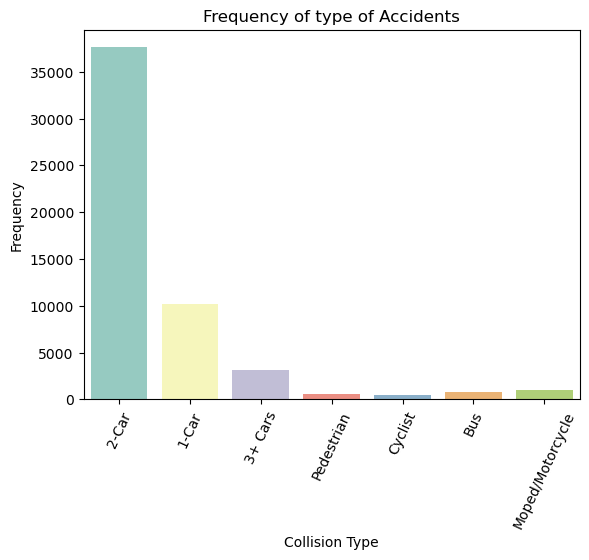

In [9]:
sns.countplot(x=data['Collision Type'],palette='Set3')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.title('Frequency of type of Accidents')

b) Weekday vs Weekend

Text(0.5, 1.0, 'Weekday Vs Weekend')

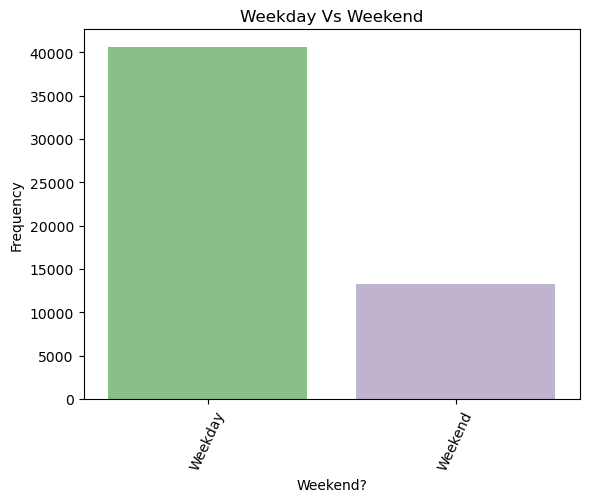

In [10]:
sns.countplot(x=data['Weekend?'],palette='Accent')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.title('Weekday Vs Weekend')

c) Percentage of Injury in Category

In [11]:
inj_val=data['Injury Type'].value_counts()

Text(0.5, 1.0, 'percentage of Injury in Category')

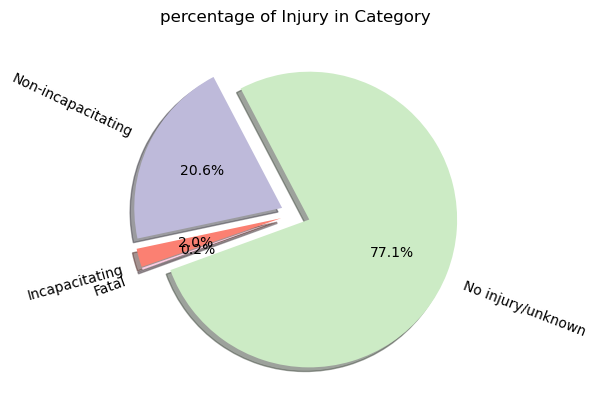

In [12]:
plt.pie(inj_val,labels=inj_val.index,startangle=200,shadow=True,autopct='%1.1f%%',rotatelabels=90,explode=(0.1,0.1,0.1,0.1),colors=[c4(0.9),c4(0.2),c4(0.3),c4(0.6)])
plt.title('percentage of Injury in Category')

d) Most Frequent Location Of Accident

In [13]:
rldata=data['Reported_Location'].value_counts().head(30)

Text(0.5, 1.0, 'Most Frequent Location Of Accident')

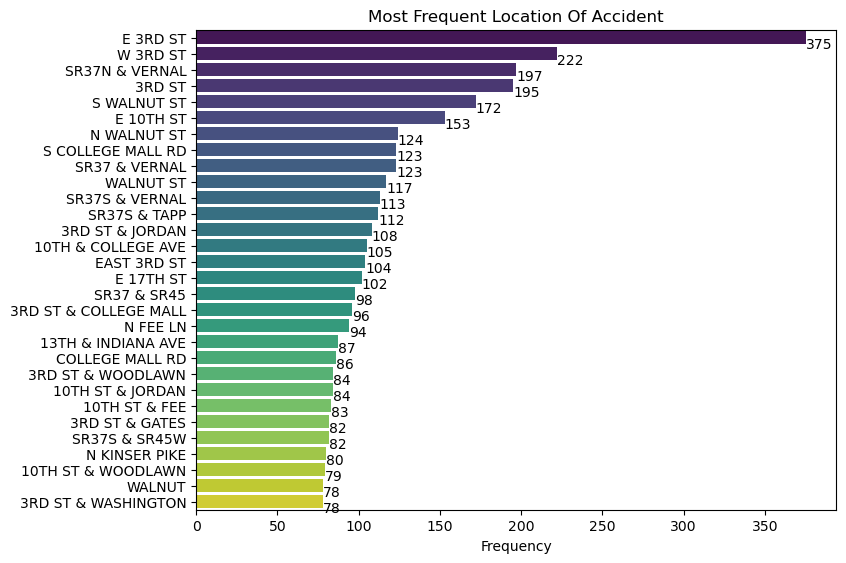

In [14]:
fig1=plt.figure()
axis1=fig1.add_axes([1,1,1,1])
sns.barplot(x=rldata,y=rldata.index,ax=axis1,palette='viridis')
for i,j in enumerate(rldata):
    axis1.text(j,i,j,va='top')
axis1.set_xlabel('Frequency')
axis1.set_title('Most Frequent Location Of Accident')

e) Collision Types in Different Years

In [15]:
grp=data.groupby('Year')
keys=grp.groups.keys()

In [16]:
infobox=[]
for i in range(2003,2016):
    infobox.append(grp.get_group(i)['Collision Type'].value_counts())

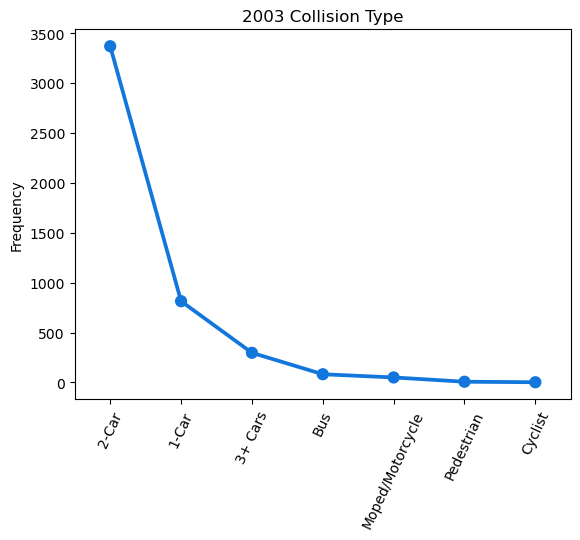

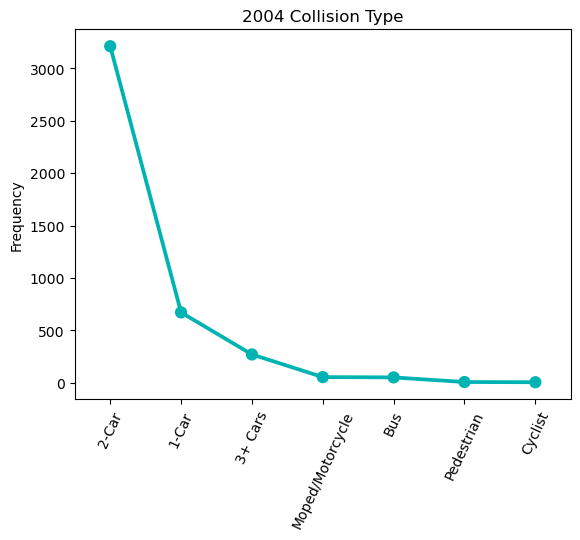

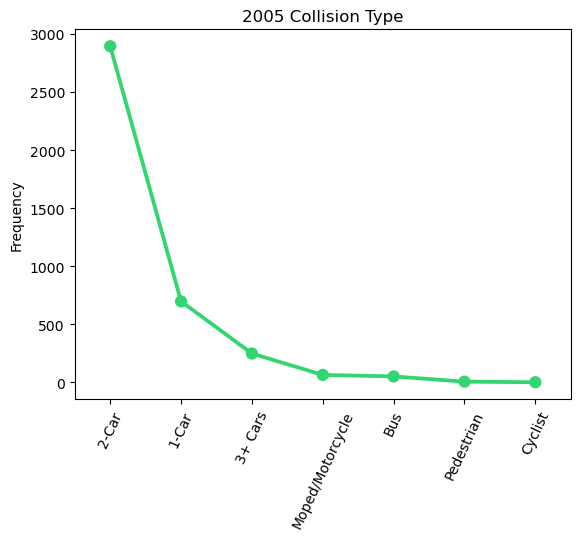

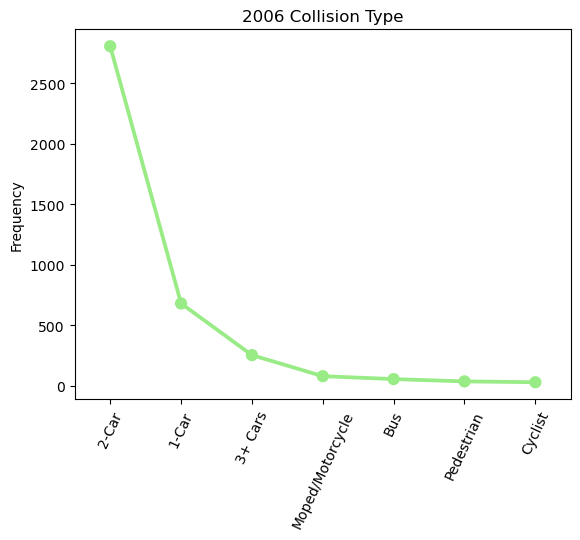

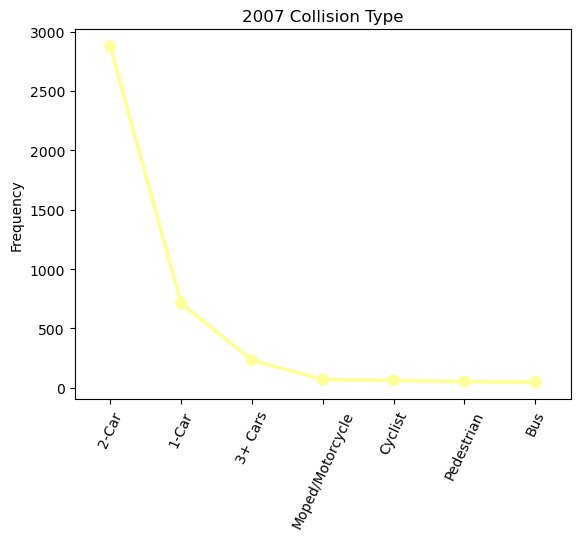

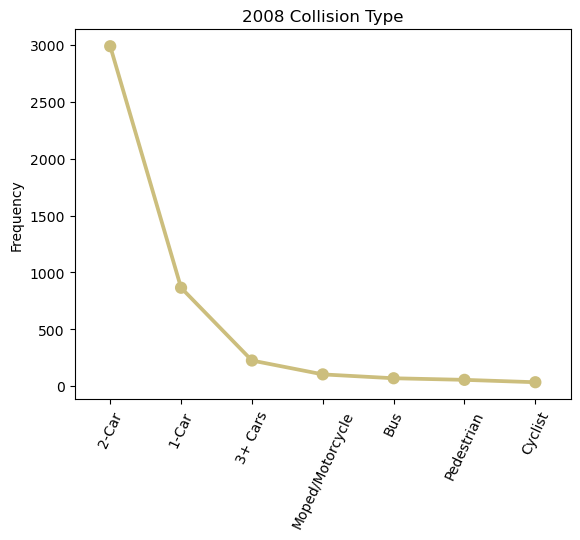

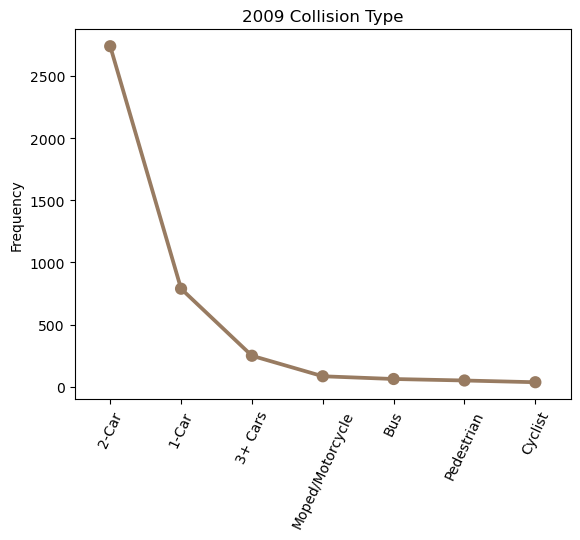

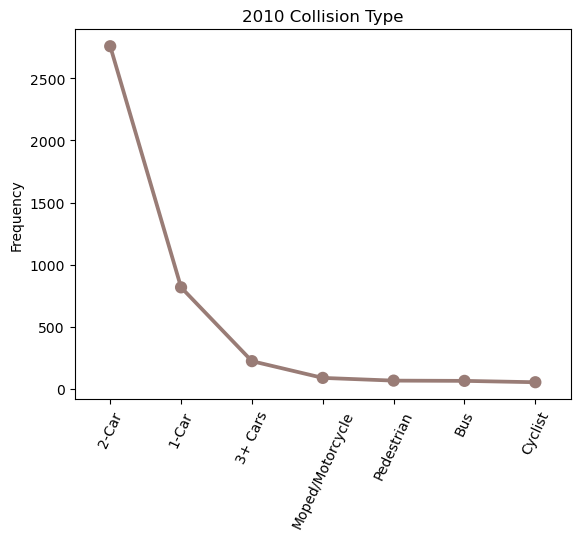

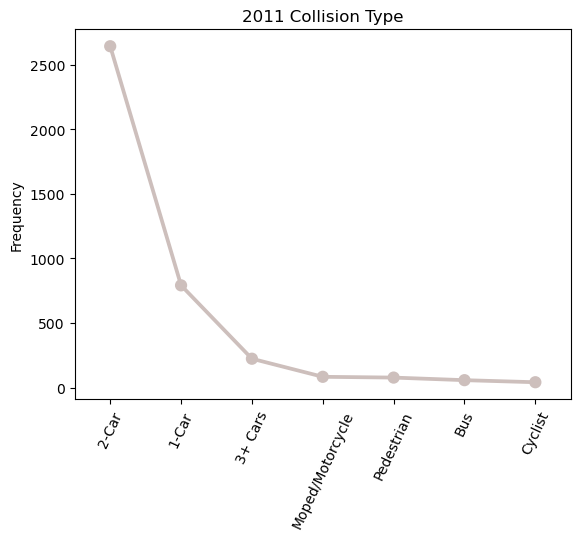

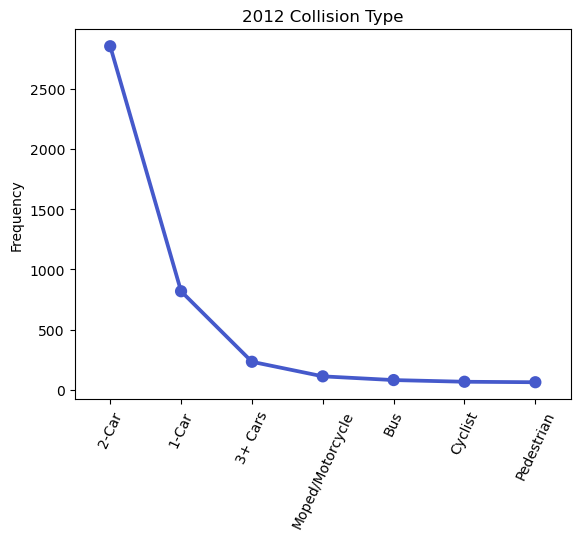

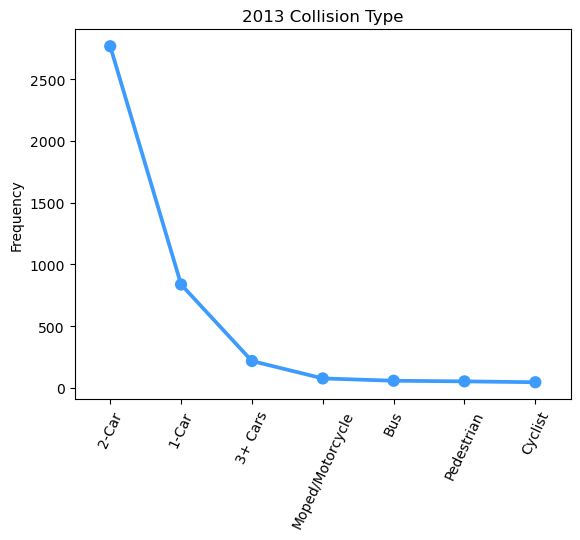

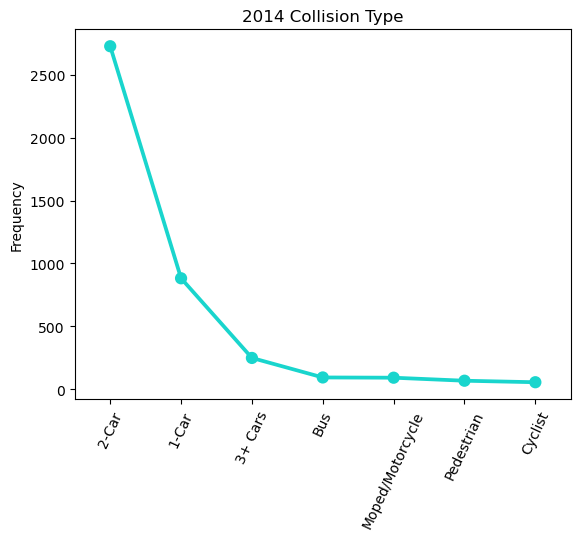

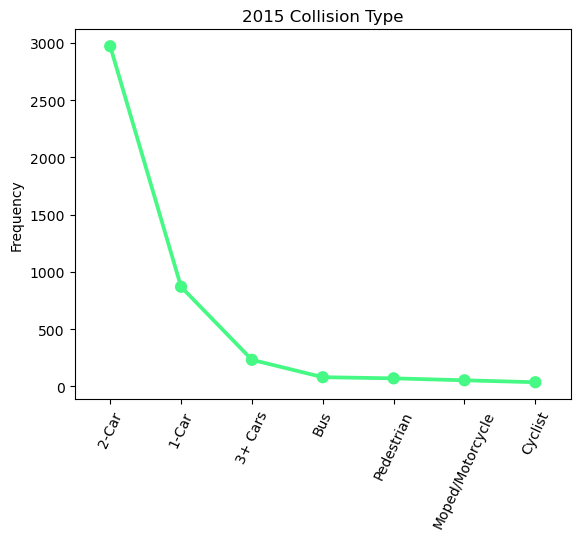

In [17]:
from matplotlib import cm
c2=cm.get_cmap('terrain')
count=0
val=0.1
for i in range(2003,2016):
    
    sns.pointplot(x=infobox[count].index,y=infobox[count],color=c2(val))
    plt.xticks(rotation=65)
    plt.ylabel('Frequency')
    plt.title('%d Collision Type'%(i))
    plt.show()
    count+=1
    val+=0.1
    if val>=0.9:
        c2=cm.get_cmap('turbo')
        val=0.1